In [2]:
import pandas as pd

dataset = pd.read_csv('C:/Users/Mateo/Desktop/UNAD/SEMESTRE II/ANÁLISIS DE DATOS/Tarea 3/Anexo 2 - Dataset Vehicle/CAR DETAILS FROM CAR DEKHO.csv')

print(dataset.head())

print(dataset.info())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

In [4]:
print(dataset.describe())

Q1 = dataset['selling_price'].quantile(0.25)
Q3 = dataset['selling_price'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartil

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset_cleaned = dataset[(dataset['selling_price'] >= lower_bound) & (dataset['selling_price'] <= upper_bound)]

print(dataset_cleaned.describe())


              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000
              year  selling_price      km_driven
count  4069.000000   4.069000e+03    4069.000000
mean   2012.882035   3.923786e+05   67498.617105
std       4.223110   2.481128e+05   46957.678504
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.000000e+05   35000.000000
50%    2013.000000   3.400000e+05   60000.000000
75%    2016.000000   5.500000e+05   90000.000000
max    2020.000000   1.165000e+06  806599.000000


Error cuadrático medio: 34242314257.92409
R² Score: 0.40897952642596413


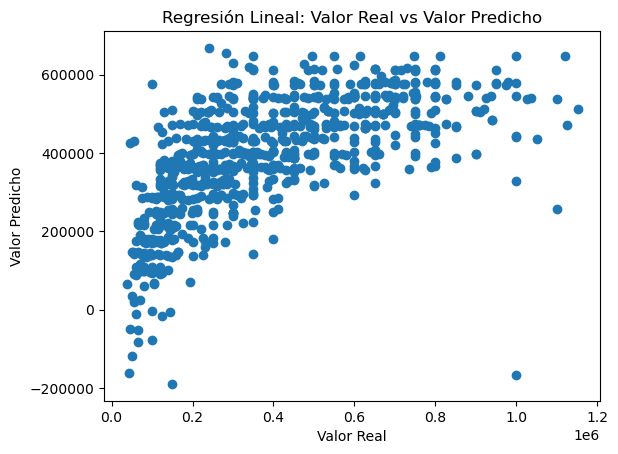

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dataset_cleaned[['year', 'km_driven']]  
y = dataset_cleaned['selling_price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'R² Score: {r2}')

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Valor Real vs Valor Predicho')
plt.show()
